# Gépi tanulás féléves feladat - Dézsi Csaba István - bdigne
## Kezdjük az adatok elemzésével, illetve, ha szükséges, az adathalmaz tisztításával

In [27]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#DATA CLEANING
#getting rid of not needed columns
ignData = pd.read_csv("ign.csv")

ignData = ignData.drop('Unnamed: 0', axis=1)
ignData = ignData.drop('url', axis=1)
ignData = ignData.drop('editors_choice', axis=1)
ignData = ignData.drop('title', axis=1)
ignData = ignData.drop('score_phrase', axis=1)

ignData


,platform,score,genre,release_year,release_month,release_day
0,PlayStation Vita,9.0,Platformer,2012,9,12
1,PlayStation Vita,9.0,Platformer,2012,9,12
2,iPad,8.5,Puzzle,2012,9,12
3,Xbox 360,8.5,Sports,2012,9,11
4,PlayStation 3,8.5,Sports,2012,9,11
...,...,...,...,...,...,...
18620,Wii U,7.6,RPG,2016,6,29
18621,PlayStation 4,9.0,"Action, Adventure",2016,6,29
18622,PlayStation 4,5.8,RPG,2016,6,28
18623,Xbox One,10.0,Adventure,2016,6,28


>>> adattípusok(dtypes):  [dtype('O'), dtype('float64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]
>>> hiányzó adatok százaléka:  [0.0, 0.0, 0.19328859060402684, 0.0, 0.0, 0.0]


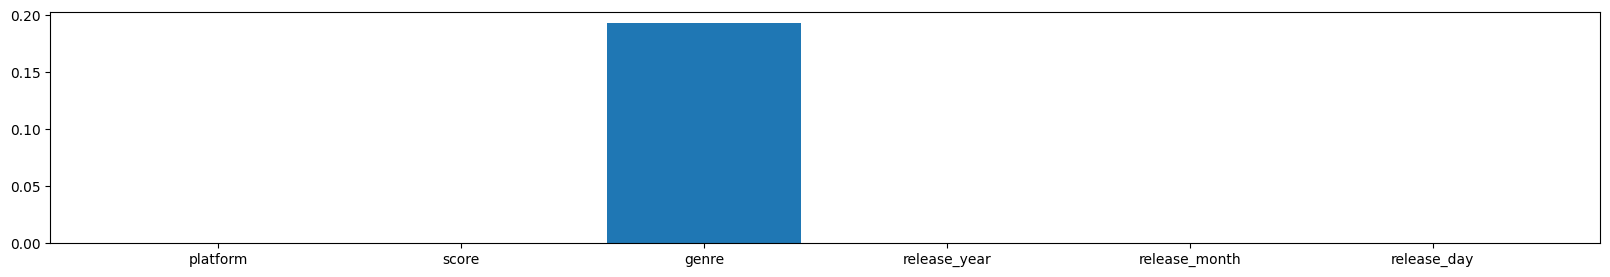

>>> látszik, hogy a genre-ban az adatok közel 20%-a NA, vagy numpy.NaN
>>> oszlop ahol több mint 0%, de kevesebb mint 40% a hiányzó értékünk:  ['genre']
>>> Látszik azért lett kidobva adatunk, de szerencsére nem sok:
	- Első futtatáskor az adathalmaz mérete: 18625 rows × 8 columns
	- Tisztítást követő méret: 18589 rows × 8 columns


,platform,score,genre,release_year,release_month,release_day
0,PlayStation Vita,9.0,Platformer,2012,9,12
1,PlayStation Vita,9.0,Platformer,2012,9,12
2,iPad,8.5,Puzzle,2012,9,12
3,Xbox 360,8.5,Sports,2012,9,11
4,PlayStation 3,8.5,Sports,2012,9,11
...,...,...,...,...,...,...
18620,Wii U,7.6,RPG,2016,6,29
18621,PlayStation 4,9.0,"Action, Adventure",2016,6,29
18622,PlayStation 4,5.8,RPG,2016,6,28
18623,Xbox One,10.0,Adventure,2016,6,28


In [29]:
#adat típusok és hiányzó adatok ellenőrzése, elemzése, esetleges kezelése

dtypes = list()
for dtype in ignData.dtypes:
    dtypes.append(dtype)

print('>>> adattípusok(dtypes): ', dtypes)
#------------------------------------------

ign_values_list = list()
cols_list = list()
for col in ignData.columns:
    pct_missing = np.mean(ignData[col].isnull())*100
    cols_list.append(col)
    ign_values_list.append(pct_missing)
print('>>> hiányzó adatok százaléka: ', ign_values_list)
#------------------------------------------


pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = ign_values_list

plt.figure(figsize=(20, 3))
plt.bar(pct_missing_df['col'], pct_missing_df['pct_missing'])
plt.show()
print('>>> látszik, hogy a genre-ban az adatok közel 20%-a NA, vagy numpy.NaN')
#------------------------------------------

less_missing_values_cols_list = list(pct_missing_df.loc[(pct_missing_df.pct_missing < 0.4) & (pct_missing_df.pct_missing > 0), 'col'].values)
ignData.dropna(subset=less_missing_values_cols_list, inplace=True)

print('>>> oszlop ahol több mint 0%, de kevesebb mint 40% a hiányzó értékünk: ', less_missing_values_cols_list)

print('>>> Látszik azért lett kidobva adatunk, de szerencsére nem sok:')
print('\t- Első futtatáskor az adathalmaz mérete: 18625 rows × 8 columns')
print('\t- Tisztítást követő méret: 18589 rows × 8 columns')
ignData

### Stringek int-é alakítása

In [30]:
#a biztonság kedvéért inkább copy-zok, nehogy elcsesszek valamit, mert akkor futtathatjuk úrja az elejétől
copiedData = ignData.copy()

#platform oszlop distinct elemeinek száma
platformCol = copiedData['platform']
platformNames = platformCol.drop_duplicates()
uniquePlatform = platformNames.count()

#genre distinct ertekei
genreCol = copiedData['genre']
genreNames = genreCol.drop_duplicates()
uniqueGenre = genreNames.count()

print('num of unique platforms =',uniquePlatform, ', num of unique genres =',uniqueGenre)
platformIndexes = []
genreIndexes = []

i=0
for platformName in platformCol:
    if (platformNames.values.__contains__(platformName)):
        index, = np.where(platformNames.values == platformName)
        platformIndexes.append(index[0])
    i+=1

i=0
for genreName in genreCol:
    if (genreNames.values.__contains__(genreName)):
        index, = np.where(genreNames.values == genreName)
        genreIndexes.append(index[0])
    i+=1


copiedData['platform'] = platformIndexes
copiedData['genre'] = genreIndexes

print('Lehet látni, hogy szépen át lett minden string alakítva int-re')
copiedData

num of unique platforms = 59 , num of unique genres = 112
Lehet látni, hogy szépen át lett minden string alakítva int-re


,platform,score,genre,release_year,release_month,release_day
0,0,9.0,0,2012,9,12
1,0,9.0,0,2012,9,12
2,1,8.5,1,2012,9,12
3,2,8.5,2,2012,9,11
4,3,8.5,2,2012,9,11
...,...,...,...,...,...,...
18620,12,7.6,5,2016,6,29
18621,11,9.0,6,2016,6,29
18622,11,5.8,5,2016,6,28
18623,54,10.0,7,2016,6,28


## Most, hogy megvan az adattisztítás kezdjül el felépíteni a train és teszt adatainkat

In [31]:
from sklearn.model_selection import train_test_split
import torch

In [32]:
#első körben szétválasztjuk a be és kimeneti adatainkat, majd ezeket sétszedjük a megszokott módon train és teszt adathalmazokba
X, y = copiedData.drop('score', axis=1), copiedData['score']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

y_train, y_test

(4593     9.0
 10390    7.6
 17438    9.0
 10203    3.7
 5638     7.8
         ... 
 6657     8.6
 12696    7.8
 12402    6.8
 18254    9.5
 16227    5.5
 Name: score, Length: 13012, dtype: float64,
 16438    7.0
 11922    7.0
 1008     8.5
 14082    7.4
 13466    8.4
         ... 
 3226     5.5
 5464     3.8
 9986     8.4
 2987     4.0
 5388     9.0
 Name: score, Length: 5577, dtype: float64)

In [33]:
X_train_raw

,platform,genre,release_year,release_month,release_day
4593,28,9,2003,2,14
10390,2,8,2008,1,8
17438,0,8,2013,12,4
10203,2,10,2007,11,20
5638,32,6,2004,2,27
...,...,...,...,...,...
6657,14,20,2005,3,8
12696,7,13,2009,3,17
12402,10,38,2009,1,22
18254,5,5,2015,11,9


In [34]:
X_test_raw

,platform,genre,release_year,release_month,release_day
16438,10,12,2011,12,2
11922,39,0,2008,10,27
1008,15,7,1998,11,11
14082,2,8,2010,1,27
13466,3,13,2009,9,3
...,...,...,...,...,...
3226,28,6,2001,7,27
5464,32,15,2003,12,15
9986,2,7,2007,10,29
2987,15,8,2001,2,7


## Kezdjük el a modellek definiálását és feltanítását
### 1.modell: Lineáris regressziós Neurális háló

In [35]:
import torch.nn as nn

# Define the model
model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    #nn.ReLU(),
    #nn.Linear(5, 1)
)

In [36]:
import torch.nn as nn
import torch.nn as nn
import torch.optim as optim
from linearRegNN import linearRegressionNN

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
opt = optim.Adam(model.parameters(), lr=0.0015)

linreg = linearRegressionNN(network=model)
linreg.setTrainTestDatas(X_train_raw, y_train, X_test_raw, y_test)
linreg.fit(epochs=10, batch_size=10, disableTrainBars=False, loss_fn=loss_fn, opt_fn=opt)

Epoch 1:   1%|          | 7/1302 [00:00<00:05, 218.88batch/s, mse=39.3]

Epoch 4:  53%|█████▎    | 692/1302 [00:02<00:02, 272.11batch/s, mse=3.04] 

In [ ]:
linreg.plotTrainingHistory()

In [16]:
from sklearn.preprocessing import StandardScaler
from linearRegNN import linearRegressionNN

loaded = torch.load('models/bestLinRegNN.pt')
#linreg = linearRegressionNN(network=model)
linreg.modelState = loaded

with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(10):
        X_sample = X_test_raw[i: i+1]
        X_sample = linreg.scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = linreg.model(X_sample)

        
        result = round(y_pred[0].numpy()[0]*1.0, 2)
        expected = round(linreg.y_test[i].numpy()[0]*1.0, 2)
        print(f'result = {result}, expected = {expected}, inference: {round(result-expected), 2}')


AttributeError: 'linearRegressionNN' object has no attribute 'scaler'

In [32]:
import torch.nn as nn
import torch.optim as optim
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
opt = optim.Adam(model.parameters(), lr=0.0015)

Epoch 200: 100%|██████████| 1302/1302 [00:06<00:00, 193.81batch/s, mse=0.734]


MSE: 0.47
RMSE: 0.68


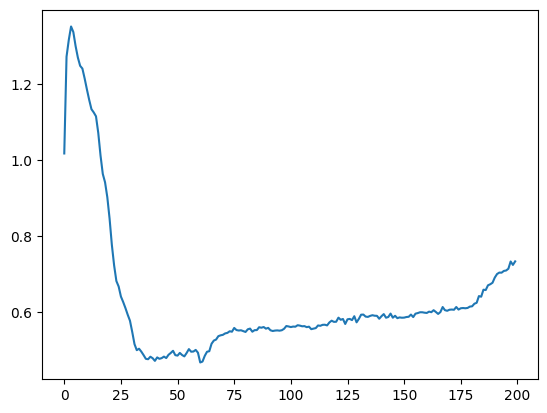

In [33]:
import tqdm
import copy
import torch
from sklearn.preprocessing import StandardScaler

# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

#epochs = 200
epochs = 10
batch_size = 10 # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
        bar.set_description(f"Epoch {epoch+1}")
        for start in bar:
            # take a batch
            X_batch = X_train[start : start+batch_size]
            y_batch = y_train[start : start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            opt.zero_grad()
            loss.backward()
            # update weights
            opt.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    mse = float(loss)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
    print("\t >>> our best MSE so far: %.2f" % best_mse)

model.load_state_dict(best_weights)

print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

MSE: 0.47
RMSE: 0.68


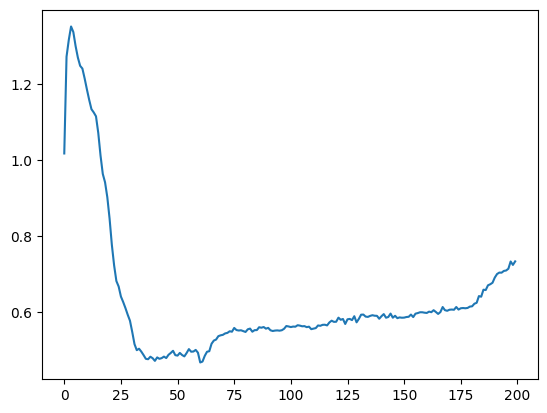

In [36]:
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [34]:
model.eval()

with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(epochs):
        X_sample = X_test_raw[i: i+1]
        X_sample = scaler.transform(X_sample)
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)

        
        result = round(y_pred[0].numpy()[0]*1.0, 2)
        expected = round(y_test[i].numpy()[0]*1.0, 2)
        print(f'result = {result}, expected = {expected}, inference: {round(result-expected), 2}')



result = 7.13, expected = 8.7, inference: (-2, 2)
result = 6.57, expected = 7.0, inference: (0, 2)
result = 6.9, expected = 7.8, inference: (-1, 2)
result = 6.94, expected = 8.5, inference: (-2, 2)
result = 7.22, expected = 6.9, inference: (0, 2)
result = 7.13, expected = 8.8, inference: (-2, 2)
result = 6.22, expected = 3.0, inference: (3, 2)
result = 7.82, expected = 6.0, inference: (2, 2)
result = 6.59, expected = 7.6, inference: (-1, 2)
result = 7.39, expected = 8.9, inference: (-2, 2)
result = 6.98, expected = 7.5, inference: (-1, 2)
result = 6.58, expected = 3.0, inference: (4, 2)
result = 7.48, expected = 7.0, inference: (0, 2)
result = 6.81, expected = 6.9, inference: (0, 2)
result = 6.79, expected = 6.5, inference: (0, 2)
result = 8.09, expected = 7.2, inference: (1, 2)
result = 6.91, expected = 6.0, inference: (1, 2)
result = 6.27, expected = 8.5, inference: (-2, 2)
result = 6.32, expected = 6.0, inference: (0, 2)
result = 6.44, expected = 9.5, inference: (-3, 2)


[]

In [1]:

testResults = []

for epoch in range(epochs):
    model.eval()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
        bar.set_description(f"Epoch {epoch+1}")
        for start in bar:
            # take a batch
            X_batch = X_test[start : start+batch_size]
            y_batch = y_test[start : start+batch_size]
            #test the model
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
    mse = float(loss)
    testResults.append(mse)

print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.plot(testResults)
plt.show()

NameError: name 'epochs' is not defined